# Exploratory Data Analysis
## Team A

In [1]:
# import libraries
import cv2
import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt
import os
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 5]
import plotly.express as px


In [2]:
from random import randint
def compare_mask(pattern):
    """
    pattern: number of pattern, 1 to 8
    Return an imagge comparing 2 images from it's mask and focus on the annomaly
    """
    img_path = 'Train/Image/'
    mask_path = 'Train/Mask/'
    rand = randint(0, 20)
    for i, x in enumerate(df_images[df_images["Pattern"] == pattern]['images_id'].iloc[rand:rand+2]):
        img1 = cv2.imread(img_path+x)
        img2 = cv2.imread(mask_path+x)
        masked = cv2.bitwise_and(img1, img2)
        vis = np.concatenate((img1, img2), axis=1)
        vis = np.concatenate((vis, masked), axis=1)
        if i == 1:
            vis = np.concatenate((vis, z), axis=1)
        z = vis

    plt.rcParams['figure.figsize'] = [35, 7]
    plt.imshow(vis)

In [3]:
from matplotlib import pyplot
def histogram(pattern):
    '''
    pattern: number of pattern, 1 to 8
    Return the frecuency of pixel values from a sample of 5 images from an specific patter
    '''
    img_path = 'Train/Image/'
    mask_path = 'Train/Mask/'
    for x in df_images[df_images["Pattern"] == pattern]['images_id'].iloc[-5:]:
        img1 = cv2.imread(img_path+x)
        hist1 = cv2.calcHist([img1],[0],None,[256],[0,256])
        pyplot.hist(img1.ravel(), bins=256, range = [0,255])


    plt.show()

In [4]:
def f(row):
    """
    row: receive a series
    Return a new coluumn to identify each image pattern
    
    """
    # Conditions for pattern A
    if (row['number_id'] <= 79)|((row['number_id'] >= 9050) & (row['number_id'] <= 9070)):
        val = 1
        
    # Conditions for pattern B
    elif ((row['number_id'] >= 80) & (row['number_id'] <= 145))|((row['number_id'] >= 9121) & (row['number_id'] <= 9154)):
        val = 2
        
    # Conditions for pattern C
    elif (row['number_id'] >= 146) & (row['number_id'] <= 211)|((row['number_id'] >= 9205) & (row['number_id'] <= 9238)):
        val = 3

    # Conditions for pattern D
    elif (row['number_id'] >= 212) & (row['number_id'] <= 281)|((row['number_id'] >= 9289) & (row['number_id'] <= 9318)):
        val = 4
        
    # Conditions for pattern E
    elif (row['number_id'] >= 282) & (row['number_id'] <= 364)|((row['number_id'] >= 9369) & (row['number_id'] <= 9385)):
        val = 5

    # Conditions for pattern F
    elif (row['number_id'] >= 365) & (row['number_id'] <= 514)|((row['number_id'] >= 9436) & (row['number_id'] <= 9535)):
        val = 6
        
    # Conditions for pattern G
    elif (row['number_id'] >= 515) & (row['number_id'] <= 664)|((row['number_id'] >= 9736) & (row['number_id'] <= 9835)):
        val = 7

    # Conditions for pattern G
    elif (row['number_id'] >= 665) & (row['number_id'] <= 814)|((row['number_id'] >= 9586) & (row['number_id'] <= 9685)):
        val = 8

    else:
        val = 0
    return val

## Get the data 
We have a dataset of length 1250 images with diferent anomalies, also with the correspong mask for each image that indicate the area of the anomalie 

In [5]:
# Craate a dataframe with the names of the images
imgs = os.listdir('Train/Image')
mask_list = os.listdir('Train/Mask')

# Check integrity of the data
df_images = pd.DataFrame(imgs, columns=['images_id'])
df_images = df_images[df_images['images_id'] != '.htaccess']
df_images['number_id'] = pd.to_numeric(df_images['images_id'].str[0:-4])

In [6]:
# Create column for pattern
df_images['Pattern'] = df_images.apply(f, axis=1)

In [198]:
# function retrieve from kaggle
def check_for_mask(x):
    if x in mask_list:
        return 1
    else:
        return 0
    
# create a new column called 'has_mask'
df_images['has_mask'] = df_images['images_id'].apply(check_for_mask)

## Pattern A 
- 0 a 79 patron A
- 9050 a 9070 patron I (Se pareece a patron A)

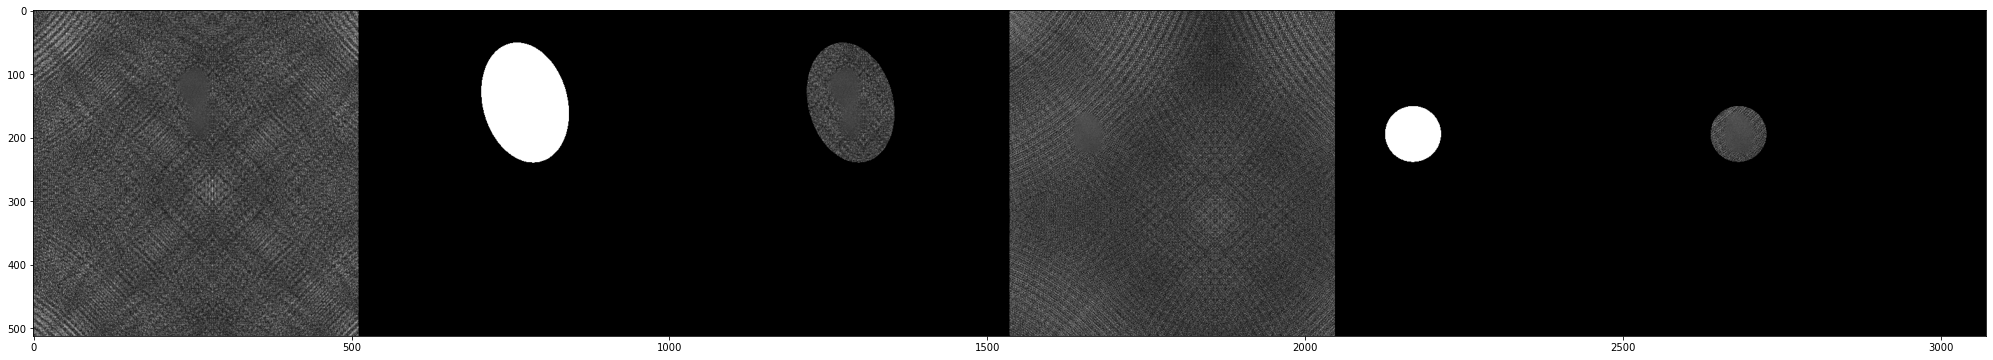

In [8]:
compare_mask(1)

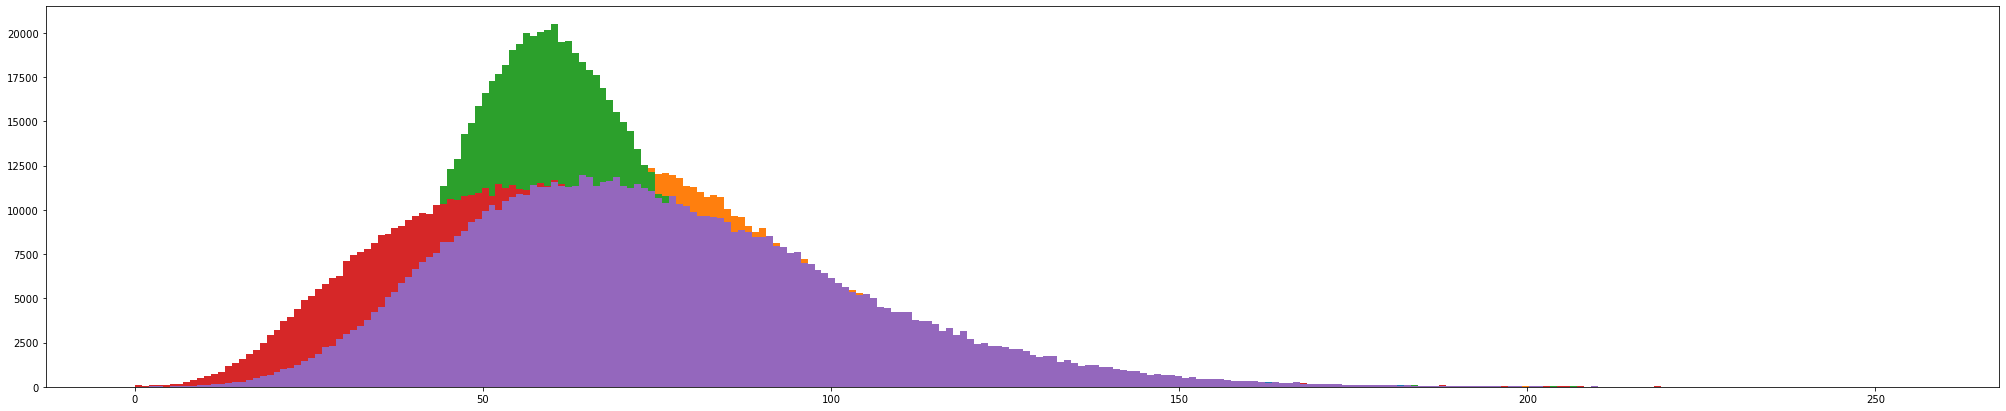

In [9]:
histogram(1)

## Pattern B
- 80 a 145 patron B
- 9121 a 9154 patron B

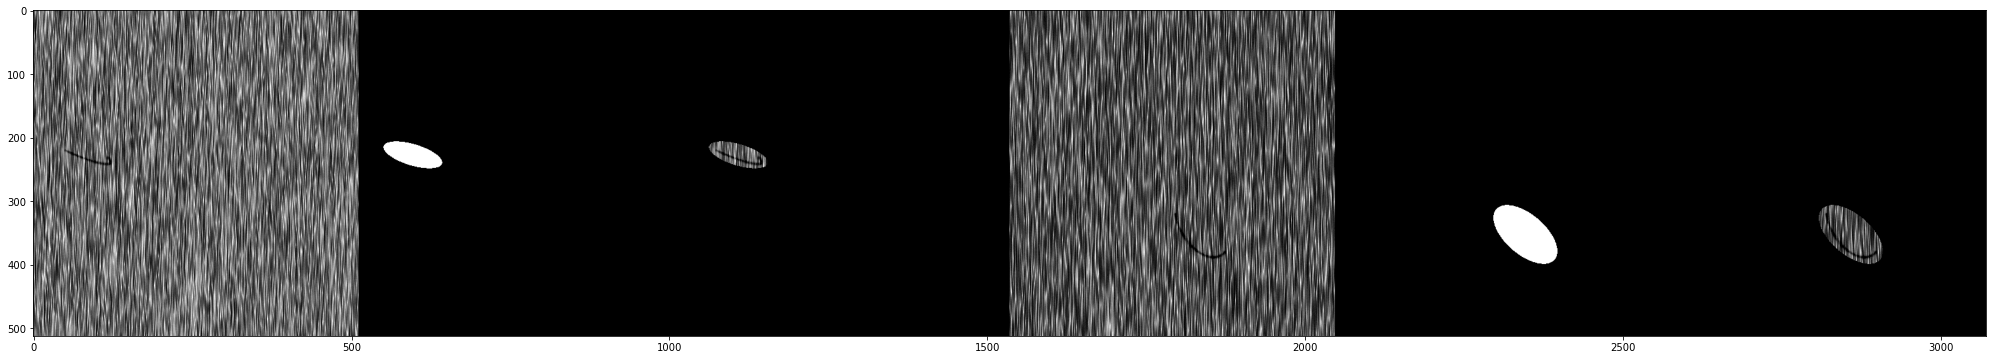

In [10]:
compare_mask(2)

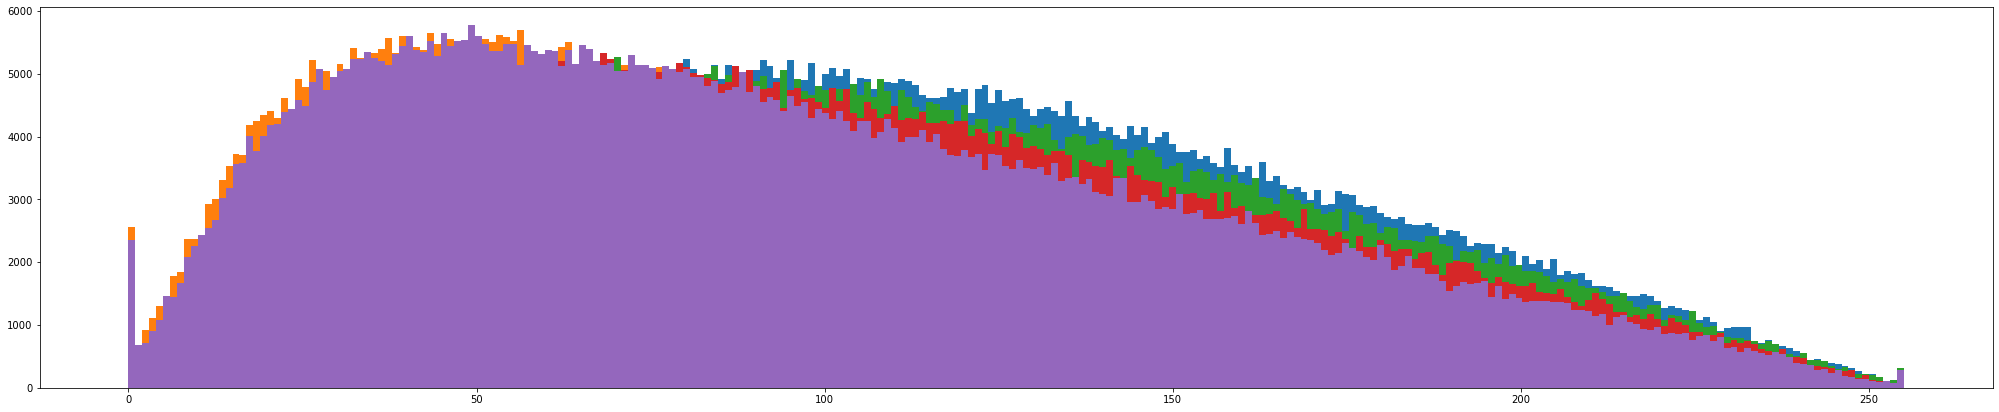

In [11]:
histogram(2)

## Pattern C
- 146 a 211 patron C
- 9205 a 9238 patron C

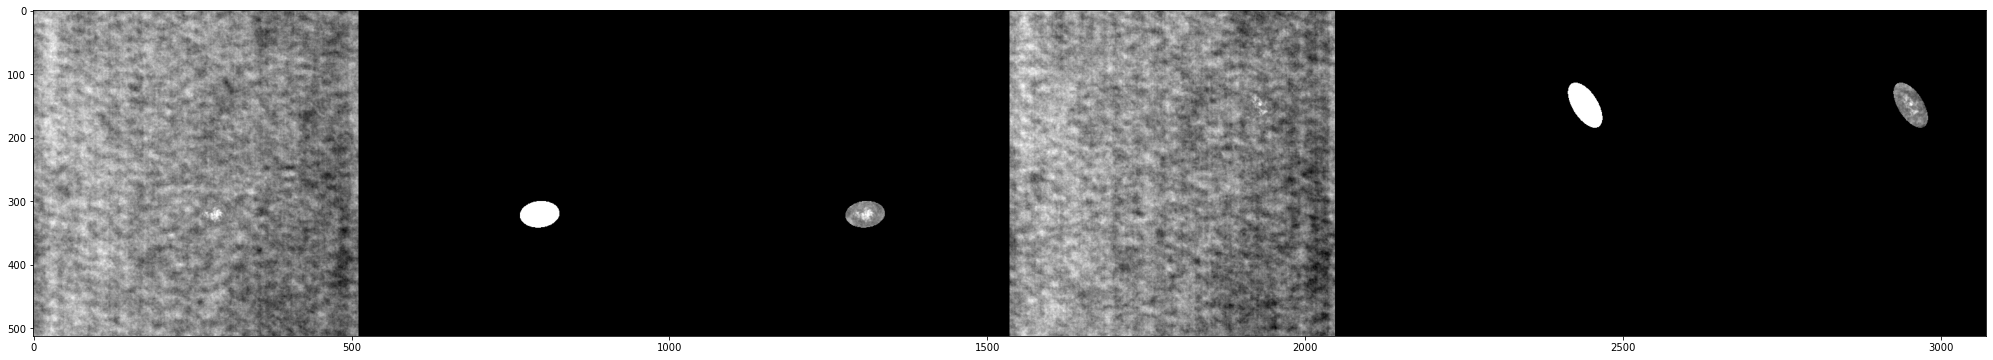

In [12]:
compare_mask(3)

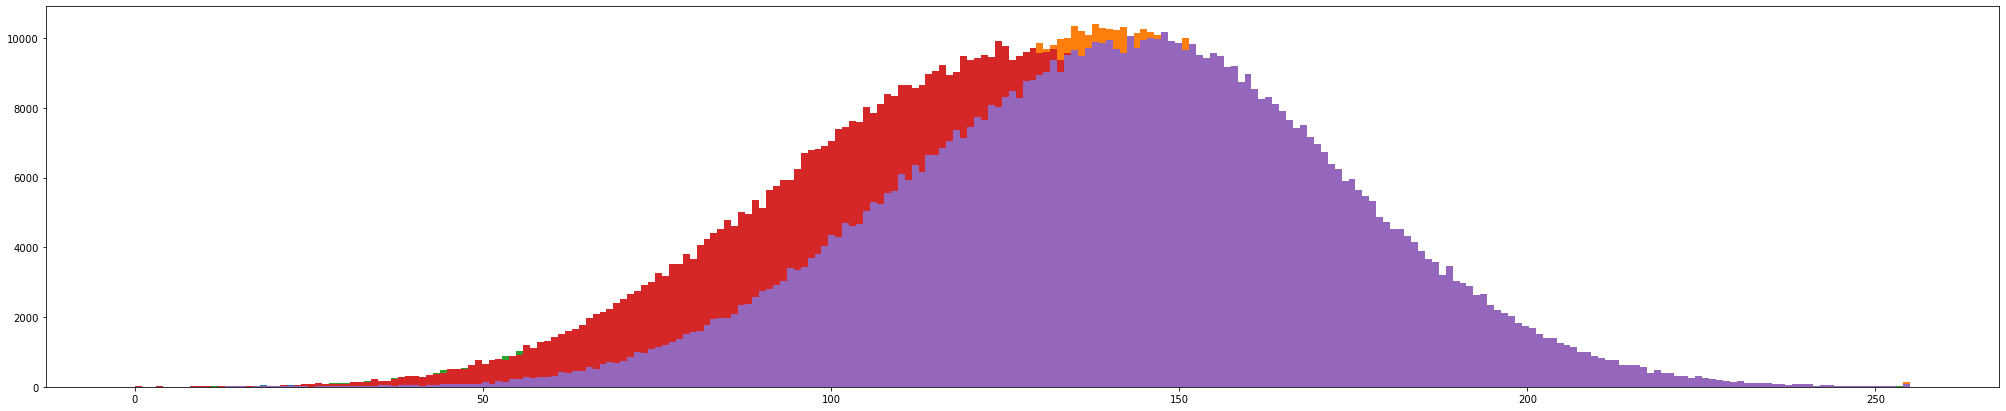

In [13]:
histogram(3)

## Pattern D
- 212 a 281 patron D
- 9289 a 9318 patron D

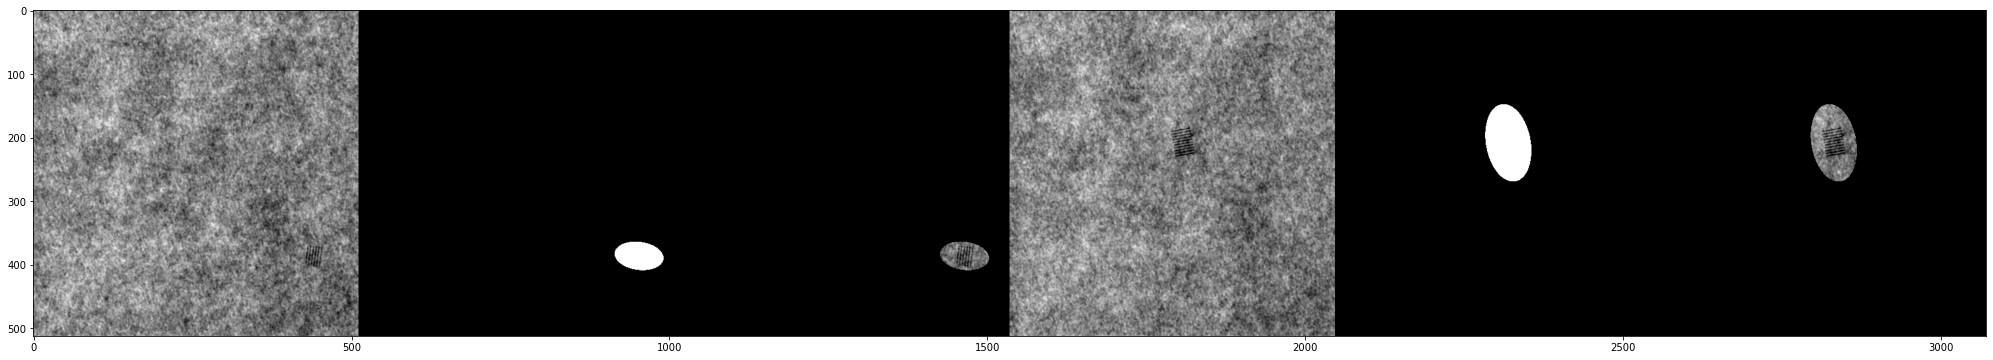

In [14]:
compare_mask(4)

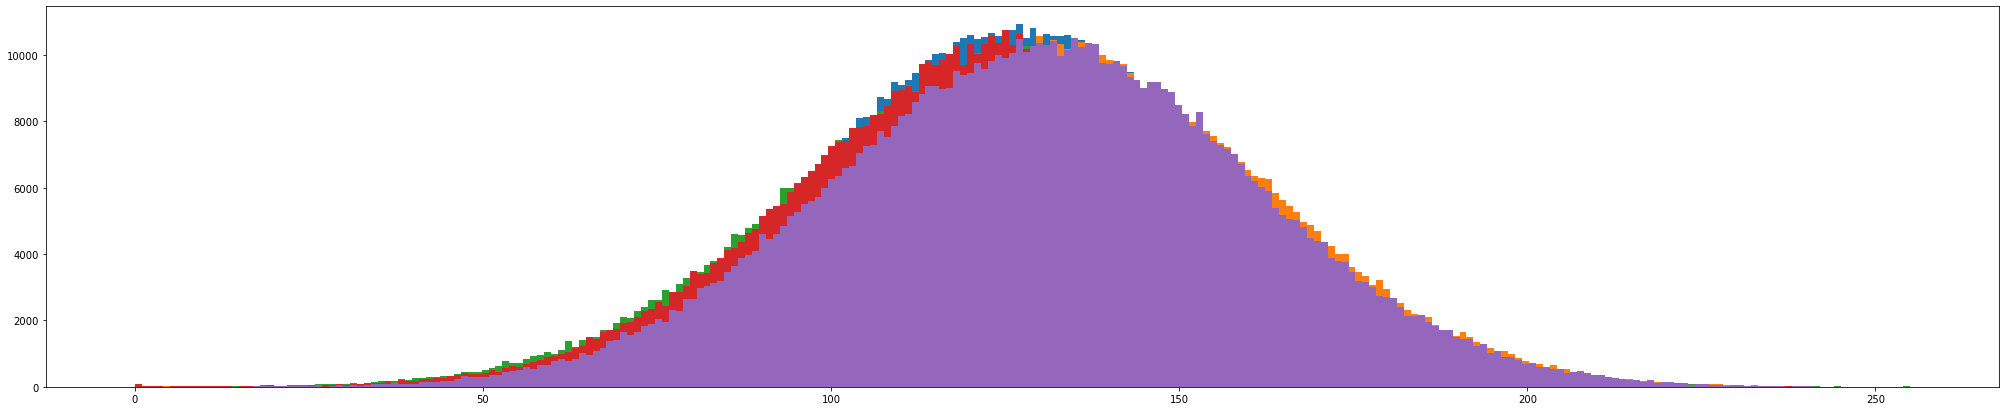

In [15]:
histogram(4)

## Pattern E
- 282 a 364 patron E
- 9369 A 9385 patron M (Se parece a patron E)

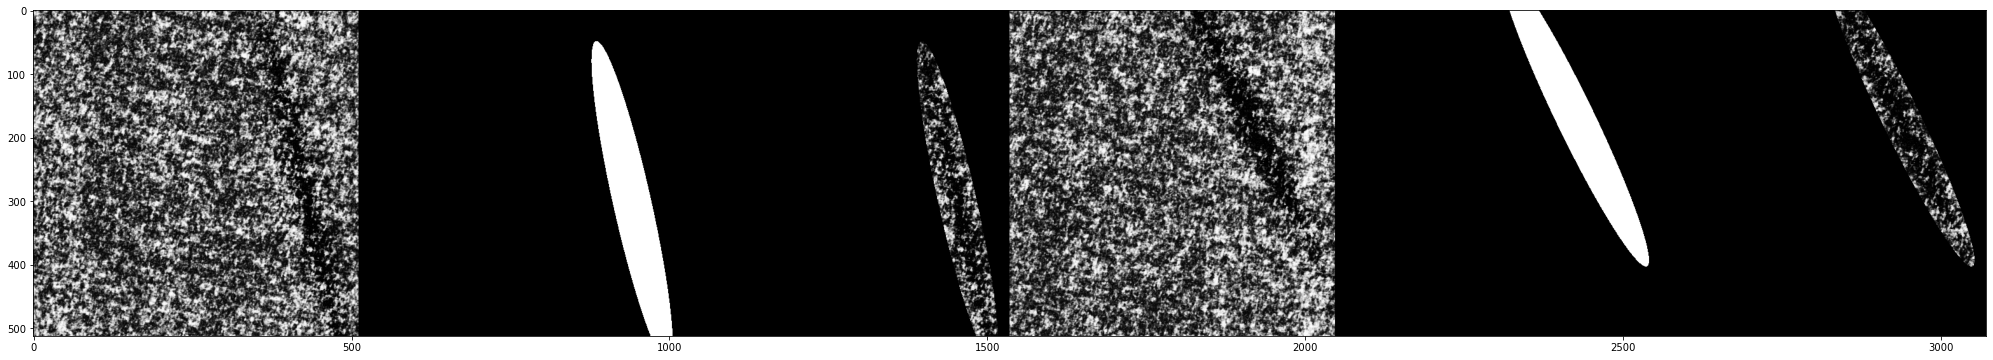

In [16]:
compare_mask(5)

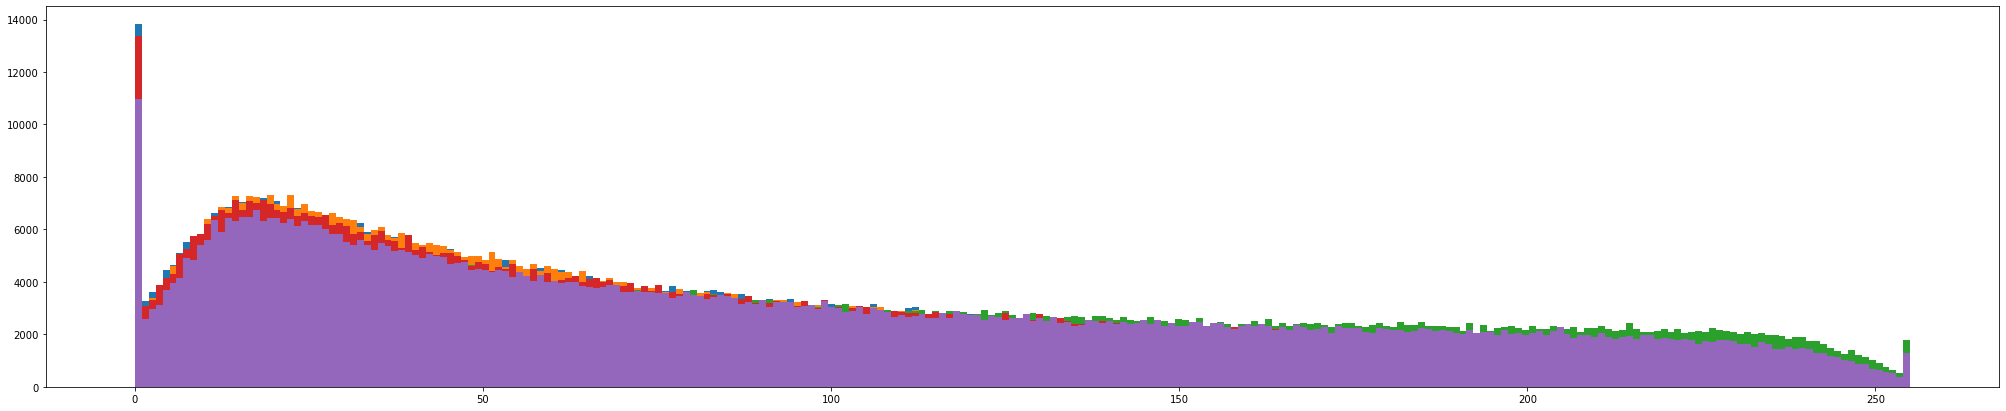

In [17]:
histogram(5)

## Pattern F
- 365 a 514 patron F
- 9436 A 9535 patron F

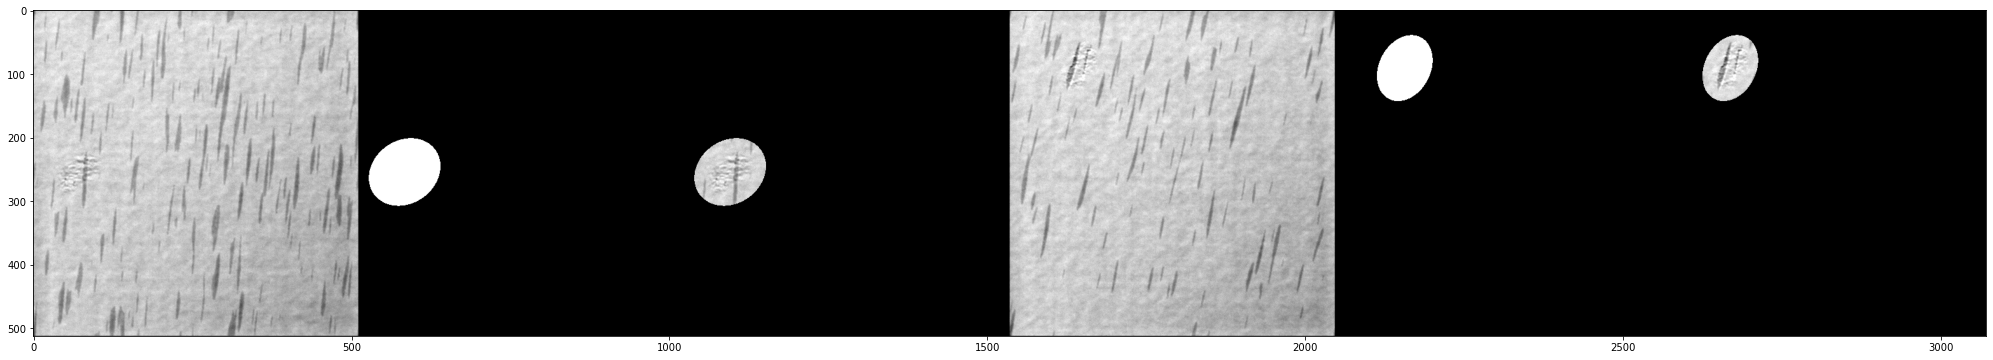

In [18]:
compare_mask(6)

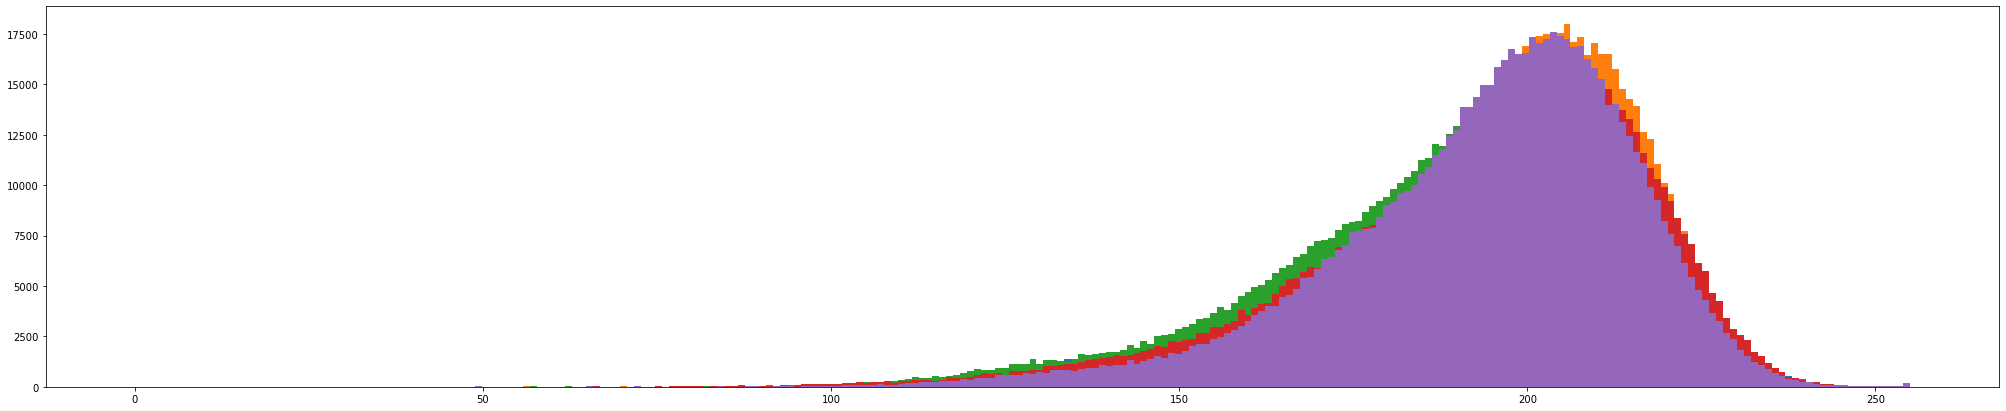

In [19]:
histogram(6)

## Pattern G 
- 515 a 664 patron G
- 9736 A 9835 patron B

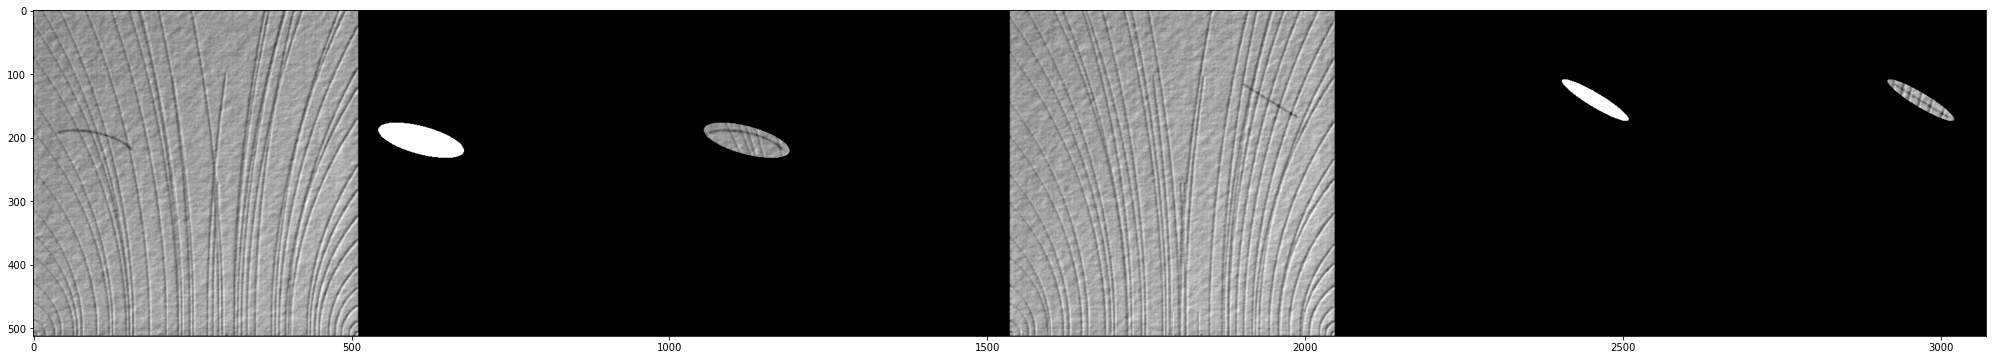

In [20]:
compare_mask(7)

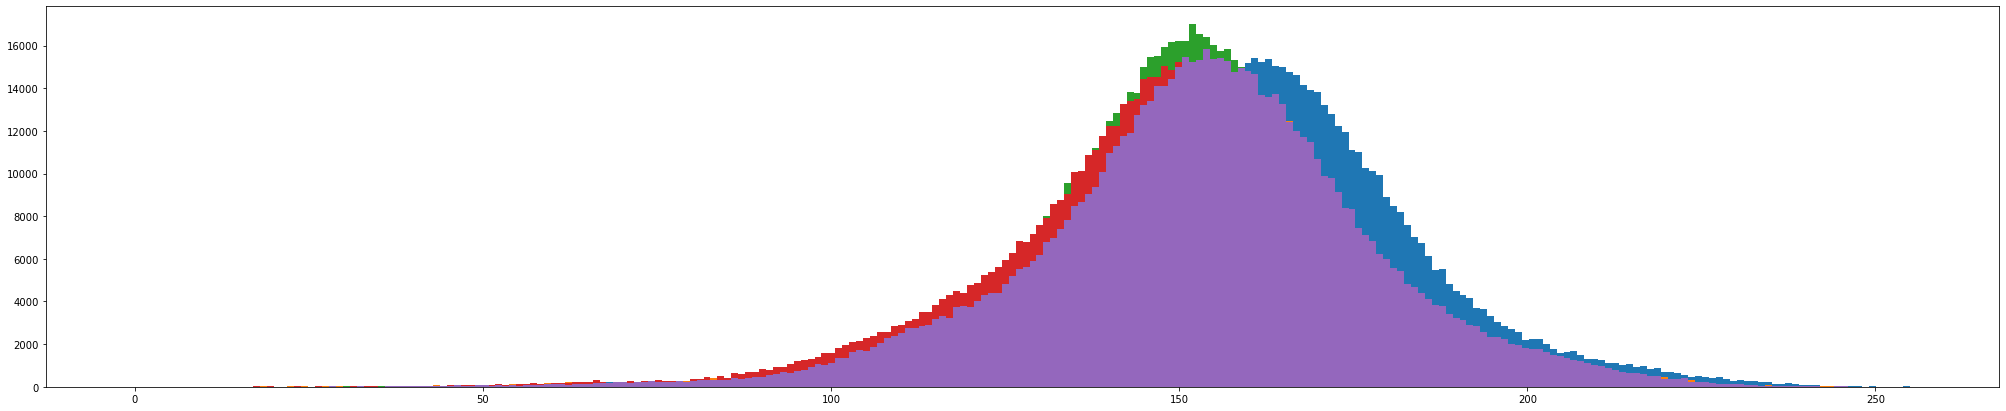

In [21]:
histogram(7)

## Pattern H
- 665 a 814 patron H 
- 9586 A 9685 patron 

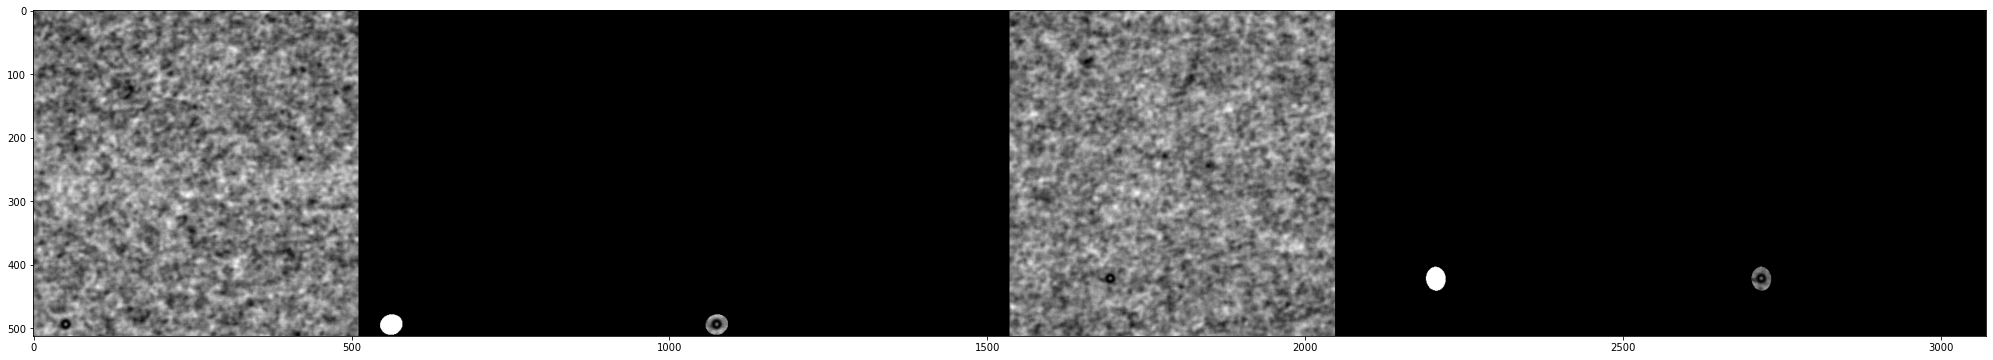

In [22]:
compare_mask(8)

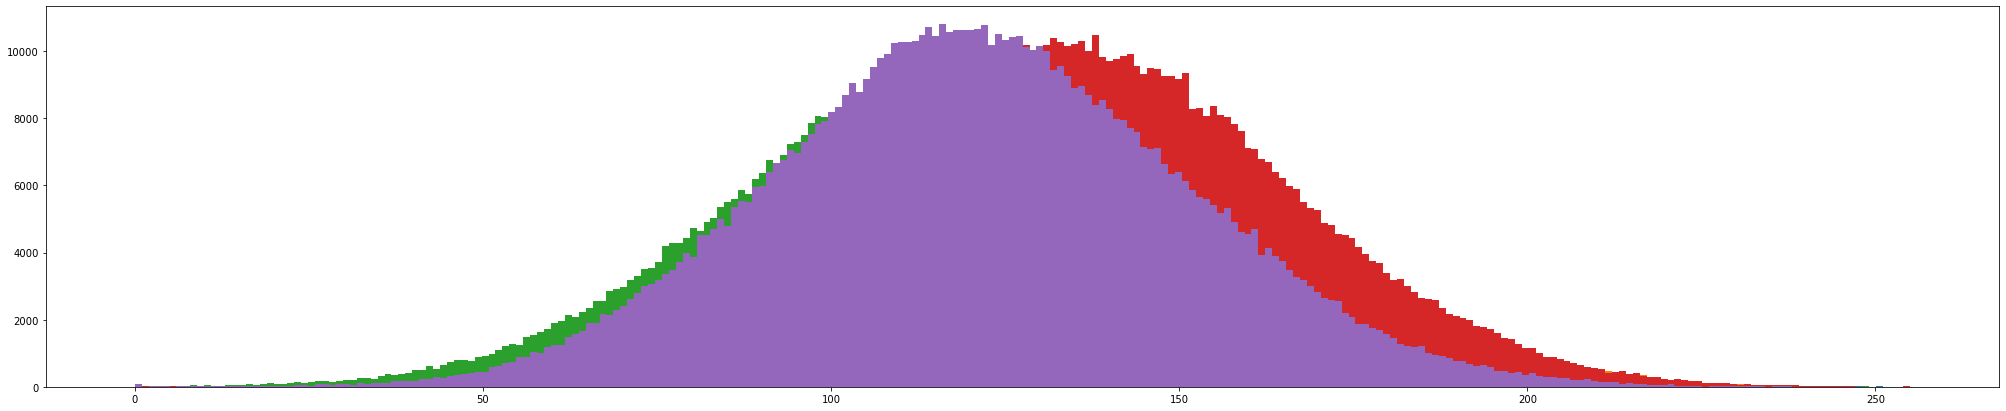

In [23]:
histogram(8)

### The dataset

In [24]:
df_images['has_mask'].value_counts()

1    1250
Name: has_mask, dtype: int64

### We have an umbalance data 

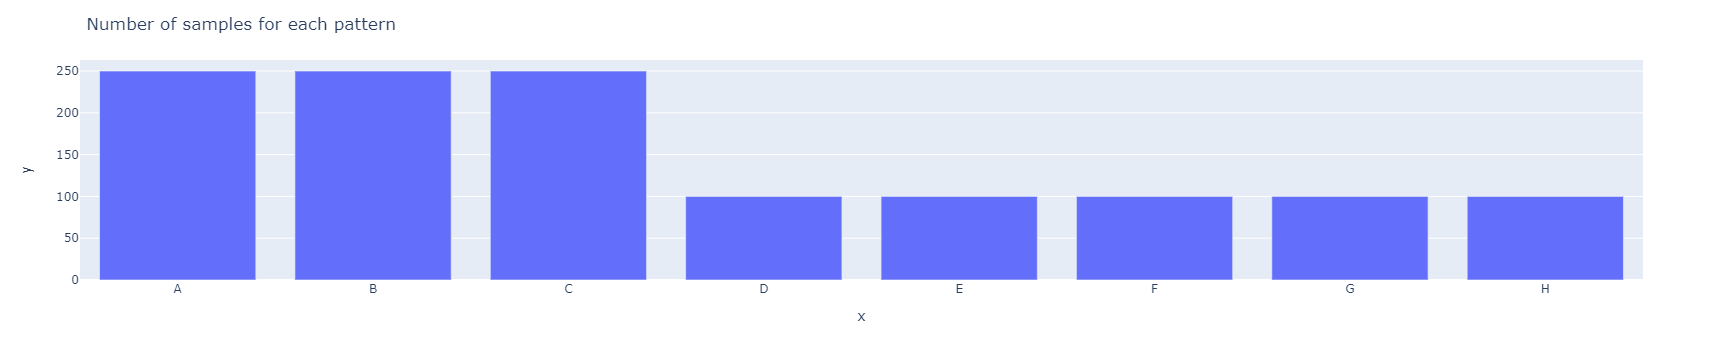

In [25]:
fig = px.bar(x =['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], y =df_images['Pattern'].value_counts())
fig.update_layout(title_text='Number of samples for each pattern')
fig.show()

## Look at Test set 
The test dataset is balanced 
- Patron A 9000 a 9049
- Patron B 9050 a 9099
- Patron C 9100 a 9149
- Patron D 9150 a 1999
- Patron E 9200 a 9249
- Patron F 9250 a 9299
- Patron H 9300 a 9349
- Patron G 9350 a 9399

In [196]:
imgs_test = os.listdir('Test/Image')
len(imgs_test)

df_test = pd.DataFrame(imgs_test, columns=['images_id'])
df_test = df_test[df_test['images_id'] != '.htaccess']
df_test['number_id'] = pd.to_numeric(df_test['images_id'].str[0:-4])

In [197]:
df_test

images_id  number_id
0    9000.png       9000
1    9001.png       9001
2    9002.png       9002
3    9003.png       9003
4    9004.png       9004
..        ...        ...
395  9395.png       9395
396  9396.png       9396
397  9397.png       9397
398  9398.png       9398
399  9399.png       9399

[400 rows x 2 columns]